## [통계적머신러닝] 과제1
통계학과 2019150419 기다연<br>
2021.09.23

### 문제1.
SMOTE와 ADASYN에서 k-neigbors를 조절하여 변화에 대해 논의하라.

In [2]:
!pip3 install imblearn
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE, ADASYN
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.pipeline import make_pipeline # imblearn에서 pipline불러오는 것 주의
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score # 성능 측정

In [29]:
def create_dataset(n_samples=2000, weights=(0.01, 0.01, 0.8), n_classes=3,
                   class_sep=0.8, n_clusters=1):
    return make_classification(n_samples=n_samples, n_features=2,
                               n_informative=2, n_redundant=0, n_repeated=0,
                               n_classes=n_classes,
                               n_clusters_per_class=n_clusters,
                               weights=list(weights),
                               class_sep=class_sep, random_state=0)

X, y = create_dataset(n_samples=2000, weights=(0.05, 0.2, 0.75))
print('Original dataset shape %s' % Counter(y))

Original dataset shape Counter({2: 1486, 1: 406, 0: 108})


Text(0.5, 1.0, 'Origin data')

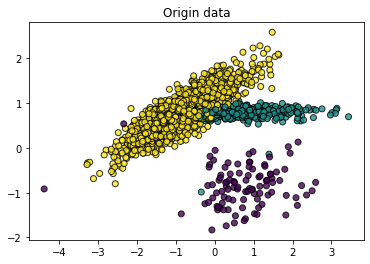

In [31]:
# 원래 데이터의 분포
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8, edgecolor='k')
plt.title('Origin data')

In [30]:
# SMOTE 
for i in range(1, 11):
    sm = SMOTE(k_neighbors=i, random_state=100)
    X_res, y_res = sm.fit_resample(X, y)
    print('Resampled dataset(k=%d) shape %s' % (i, Counter(y_res)))

Resampled dataset(k=1) shape Counter({1: 1486, 0: 1486, 2: 1486})
Resampled dataset(k=2) shape Counter({1: 1486, 0: 1486, 2: 1486})
Resampled dataset(k=3) shape Counter({1: 1486, 0: 1486, 2: 1486})
Resampled dataset(k=4) shape Counter({1: 1486, 0: 1486, 2: 1486})
Resampled dataset(k=5) shape Counter({1: 1486, 0: 1486, 2: 1486})
Resampled dataset(k=6) shape Counter({1: 1486, 0: 1486, 2: 1486})
Resampled dataset(k=7) shape Counter({1: 1486, 0: 1486, 2: 1486})
Resampled dataset(k=8) shape Counter({1: 1486, 0: 1486, 2: 1486})
Resampled dataset(k=9) shape Counter({1: 1486, 0: 1486, 2: 1486})
Resampled dataset(k=10) shape Counter({1: 1486, 0: 1486, 2: 1486})


In [44]:
def plot_resampling(X, y, sampling, ax):
    X_res, y_res = sampling.fit_resample(X, y)
    ax.scatter(X_res[:, 0], X_res[:, 1], c=y_res, alpha=0.8, edgecolor='k')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    return Counter(y_res)

def plot_decision_function(X, y, clf, ax):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.8, c=y, edgecolor='k')

(4458, 2) (4458,)
0.860699865410498
(4458, 2) (4458,)
0.8822341857335128
(4458, 2) (4458,)
0.8981606101390758


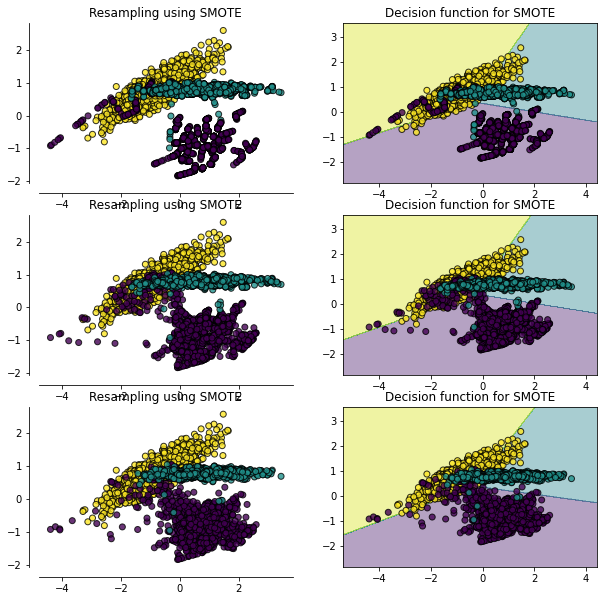

In [48]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(10, 10))
ax_arr = ((ax1, ax2), (ax3, ax4), (ax5, ax6))

for ax, sampler in zip(ax_arr, (
                SMOTE(sampling_strategy='auto', random_state=2020, k_neighbors=1),
                SMOTE(sampling_strategy='auto', random_state=2020, k_neighbors=10),
                SMOTE(sampling_strategy='auto', random_state=2020, k_neighbors=100))):\
    
    plot_resampling(X, y, sampler, ax[0])
    ax[0].set_title('Resampling using {}'.format(
        sampler.__class__.__name__))
    
    X_res, y_res = sampler.fit_resample(X, y)
    print(X_res.shape, y_res.shape)
    clf = LinearSVC(random_state=2020) 
    clf.fit(X_res, y_res)
    
    # 성능 측정 
    train_pred = clf.predict(X_res) # train predict
    print(accuracy_score(y_res, train_pred))
    
    plot_decision_function(X_res, y_res, clf, ax[1])
    ax[1].set_title('Decision function for {}'.format(sampler.__class__.__name__))

In [8]:
# ADASYN
for i in range(1, 11):
    ada = ADASYN(n_neighbors=i, random_state=10)
    X_res, y_res = ada.fit_resample(X, y)
    print('Resampled dataset(k=%d) shape from ADASYN %s' % (i, Counter(y_res)))

Resampled dataset(k=1) shape from ADASYN Counter({2: 3552, 0: 3524, 1: 3469, 3: 3429})
Resampled dataset(k=2) shape from ADASYN Counter({2: 3550, 3: 3509, 1: 3469, 0: 3407})
Resampled dataset(k=3) shape from ADASYN Counter({3: 3592, 2: 3547, 0: 3488, 1: 3469})
Resampled dataset(k=4) shape from ADASYN Counter({3: 3613, 2: 3490, 1: 3469, 0: 3367})
Resampled dataset(k=5) shape from ADASYN Counter({3: 3642, 2: 3533, 1: 3469, 0: 3453})
Resampled dataset(k=6) shape from ADASYN Counter({2: 3485, 0: 3484, 1: 3469, 3: 3346})
Resampled dataset(k=7) shape from ADASYN Counter({0: 3539, 2: 3533, 1: 3469, 3: 3315})
Resampled dataset(k=8) shape from ADASYN Counter({3: 3579, 0: 3498, 1: 3469, 2: 3463})
Resampled dataset(k=9) shape from ADASYN Counter({2: 3553, 3: 3487, 1: 3469, 0: 3417})
Resampled dataset(k=10) shape from ADASYN Counter({1: 3469, 0: 3458, 2: 3439, 3: 3434})


(4470, 2) (4470,)
0.5568232662192394
(4454, 2) (4454,)
0.5972159856308936
(4438, 2) (4438,)
0.7823343848580442


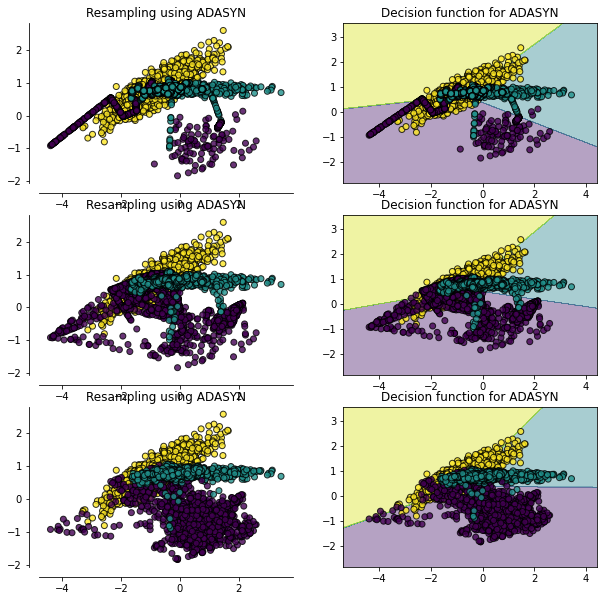

In [49]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(10, 10))
ax_arr = ((ax1, ax2), (ax3, ax4), (ax5, ax6))

for ax, sampler in zip(ax_arr, (
                ADASYN(sampling_strategy='auto', random_state=2020, n_neighbors=1),
                ADASYN(sampling_strategy='auto', random_state=2020, n_neighbors=10),
                ADASYN(sampling_strategy='auto', random_state=2020, n_neighbors=100))):\
    
    plot_resampling(X, y, sampler, ax[0])
    ax[0].set_title('Resampling using {}'.format(
        sampler.__class__.__name__))
    
    X_res, y_res = sampler.fit_resample(X, y)
    print(X_res.shape, y_res.shape)
    clf = LinearSVC(random_state=2020) 
    clf.fit(X_res, y_res)
    
    # 성능 측정 
    train_pred = clf.predict(X_res) # train predict
    print(accuracy_score(y_res, train_pred))
    
    plot_decision_function(X_res, y_res, clf, ax[1])
    ax[1].set_title('Decision function for {}'.format(sampler.__class__.__name__))

### 문제2.
특성변수의 선택에서 교재에 있는 digit 데이터를 이용하여 목적변수가 분류일 때 chi2, f_classif, 그리고 mutual_info_classif를 적용한 결과를 비교하라.

In [93]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
from sklearn.datasets import load_digits
import collections
import numpy as np

x,y = load_digits(return_X_y=True) # digit 데이터: 0~9까지의 숫자이미지를 2D tensor로 전환한 자료
print(x.shape, y.shape)

(1797, 64) (1797,)


In [118]:
sb_chi = SelectKBest(score_func=chi2, k=20)
x_chi = sb_chi.fit_transform(x,y)
sb_f = SelectKBest(score_func=f_classif, k=20)
x_f = sb_f.fit_transform(x,y)
sb_mi = SelectKBest(score_func=mutual_info_classif, k=20)
x_mi = sb_mi.fit_transform(x,y)

cols_chi = sb_chi.get_support(indices=True)
cols_f = sb_f.get_support(indices=True)
cols_mi = sb_mi.get_support(indices=True)

features_chi = pd.DataFrame(x).iloc[:,cols_chi]
features_f = pd.DataFrame(x).iloc[:,cols_f]
features_mi = pd.DataFrame(x).iloc[:,cols_mi]

print("Chi2:", features_chi.columns)
print("F:", features_f.columns)
print("Mutual Information:", features_mi.columns)

Chi2: Int64Index([5, 6, 13, 19, 20, 21, 26, 28, 30, 33, 34, 41, 42, 43, 44, 46, 54,
            58, 61, 62],
           dtype='int64')
F: Int64Index([2, 10, 13, 20, 21, 26, 28, 30, 33, 34, 36, 38, 42, 43, 44, 46, 54,
            58, 60, 61],
           dtype='int64')
Mutual Information: Int64Index([2, 10, 13, 20, 21, 26, 28, 30, 33, 34, 36, 38, 42, 43, 44, 53, 54,
            58, 60, 61],
           dtype='int64')
